<a href="https://colab.research.google.com/github/Rahul21sai/DL_projects/blob/main/4_CIFAR_10_Object_Detection_using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#data set api
!kaggle competitions download -c cifar-10

 99% 710M/715M [00:05<00:00, 133MB/s]
100% 715M/715M [00:05<00:00, 144MB/s]


In [4]:
!ls


cifar-10.zip  kaggle.json  sample_data


In [5]:
#extracting the zip file
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the data is extracted')

the data is extracted


In [6]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [7]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 92.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.8 MB/s eta 0:00:00


In [8]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall() #archive.extractall(path='trainging data)
archive.close()


In [9]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


importing dependencies

In [10]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [11]:
filenames = os.listdir('/content/train')

In [12]:
type(filenames)

list

In [13]:
len(filenames)

50000

In [14]:
print(filenames[0:5])
print(filenames[-5:])

['27467.png', '16176.png', '9200.png', '37816.png', '30924.png']
['1399.png', '7653.png', '29680.png', '47433.png', '29300.png']



**Labels Processing**

In [15]:
label_df = pd.read_csv('/content/trainLabels.csv')

In [16]:
label_df.shape

(50000, 2)

In [17]:
label_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [18]:
label_df[label_df['id']==27476]

,id,label
27475,27476,cat


In [19]:
label_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [20]:
label_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [21]:
label_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [22]:
label_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [23]:
label_dictionary ={'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [label_dictionary[i] for i in label_df['label']]

In [24]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


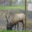

In [25]:
#displaying the sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/27467.png')
cv2_imshow(img)

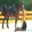

In [26]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/16176.png')
cv2_imshow(img)

In [27]:
id_list = list(label_df['id'])

In [28]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


image processing

In [29]:
#convert imges to numpy images

train_data_folder = '/content/train/'

data = []

for id in id_list:
  # img_path = train_data_folder + str(id) +'.png'
  # print(img_path)

  # if id >=5:
  #   break
  image = Image.open(train_data_folder + str (id) + '.png')

  image = np.array(image)
  data.append(image)


In [30]:
type(data)

list

In [31]:
len(data)

50000

In [32]:
type(data[0])

numpy.ndarray

In [33]:
data[0].shape

(32, 32, 3)

In [34]:
data[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [35]:
# convert image list and label list to numpy arrays
x = np.array(data)
y = np.array(labels)


In [36]:
type(x)

numpy.ndarray

In [37]:
print(x.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


**train test split**

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [39]:
print(x.shape,x_train.shape,x_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [40]:
# scaling the data

x_train_scaled = x_train/255

x_test_scaled = x_test/255

In [41]:
x_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

**building the neural network**

In [42]:
import tensorflow as tf
from tensorflow import keras

In [43]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

In [44]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [45]:
#  training the neural network
model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=25)

Epoch 1/25
1125/1125 [==============================] - 9s 3ms/step - loss: 1.9821 - acc: 0.2685 - val_loss: 1.8228 - val_acc: 0.3343
Epoch 2/25
1125/1125 [==============================] - 4s 4ms/step - loss: 1.8452 - acc: 0.3344 - val_loss: 1.8482 - val_acc: 0.3380
Epoch 3/25
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8126 - acc: 0.3499 - val_loss: 1.8360 - val_acc: 0.3365
Epoch 4/25
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7870 - acc: 0.3624 - val_loss: 1.7799 - val_acc: 0.3553
Epoch 5/25
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7733 - acc: 0.3670 - val_loss: 1.7623 - val_acc: 0.3570
Epoch 6/25
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7641 - acc: 0.3695 - val_loss: 1.7802 - val_acc: 0.3702
Epoch 7/25
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7591 - acc: 0.3717 - val_loss: 1.7505 - val_acc: 0.3665
Epoch 8/25
1125/1125 [==============================] - 3s 3ms

**ResNet50**

In [46]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [47]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [48]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [52]:
from keras.src.callbacks import learning_rate_schedule
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [53]:
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 464s 387ms/step - loss: 2.0029 - acc: 0.3335 - val_loss: 1.2251 - val_acc: 0.6055
Epoch 2/10
1125/1125 [==============================] - 433s 385ms/step - loss: 1.2483 - acc: 0.6008 - val_loss: 0.6410 - val_acc: 0.8305
Epoch 3/10
1125/1125 [==============================] - 439s 390ms/step - loss: 0.9224 - acc: 0.7318 - val_loss: 0.4712 - val_acc: 0.8802
Epoch 4/10
1125/1125 [==============================] - 439s 390ms/step - loss: 0.7140 - acc: 0.8116 - val_loss: 0.3769 - val_acc: 0.9055
Epoch 5/10
1125/1125 [==============================] - 439s 390ms/step - loss: 0.5653 - acc: 0.8623 - val_loss: 0.3543 - val_acc: 0.9057
Epoch 6/10
1125/1125 [==============================] - 439s 390ms/step - loss: 0.4519 - acc: 0.9003 - val_loss: 0.3028 - val_acc: 0.9150
Epoch 7/10
1125/1125 [==============================] - 439s 390ms/step - loss: 0.3626 - acc: 0.9247 - val_loss: 0.2819 - val_acc: 0.9233
Epoch 8/10
1125/1125 [============

In [54]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 39s 118ms/step - loss: 0.2859 - acc: 0.9183
Test Accuracy = 0.9182999730110168


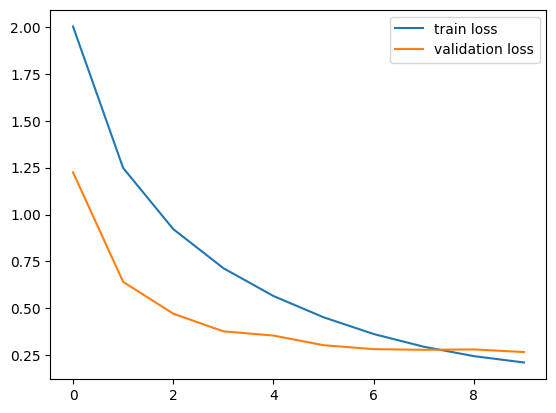

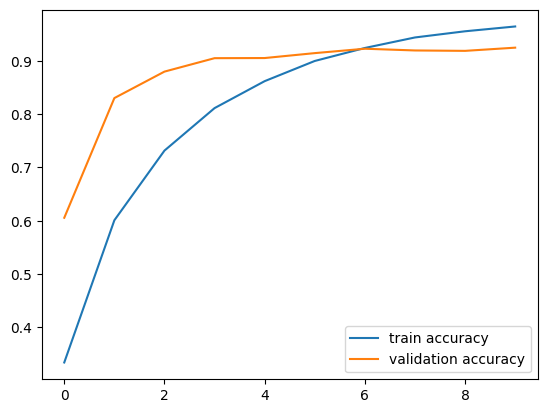

In [55]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()